In [1]:
import pandas as pd
df = pd.read_excel('order_details.xlsx')
df.head()

,Name,Email,Product,Transaction Date
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              581 non-null    object
 1   Email             581 non-null    object
 2   Product           581 non-null    object
 3   Transaction Date  581 non-null    object
dtypes: object(4)
memory usage: 18.3+ KB


In [3]:
df.describe(include="all")

,Name,Email,Product,Transaction Date
count,581,581,581,581
unique,525,525,252,581
top,PERSON_470,PERSON_470@gmail.com,PRODUCT_75,01/03/2021 00:47:26
freq,5,5,74,1


# Column Manipulations

In [4]:
# adding day column to df
df['Day'] = df['Transaction Date'].str[1:2]
df['Day'].astype('str').astype('int')

0      1
1      1
2      1
3      1
4      1
      ..
576    7
577    7
578    7
579    7
580    7
Name: Day, Length: 581, dtype: int32

In [5]:
# adding hours colums to df
df['Hour'] = df['Transaction Date'].str[11:13]
df['Hour'].astype('str').astype('int')

0       0
1       2
2       9
3       9
4      10
       ..
576    23
577    23
578    23
579    23
580    23
Name: Hour, Length: 581, dtype: int32

In [6]:
# converting product string to product list
df['Product List'] = df['Product'].str.split(',')
df.head()

,Name,Email,Product,Transaction Date,Day,Hour,Product List
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26,1,00,[PRODUCT_75]
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07,1,02,[PRODUCT_75]
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43,1,09,[PRODUCT_63]
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48,1,09,[PRODUCT_63]
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46,1,10,"[PRODUCT_34, PRODUCT_86, PRODUCT_57, PRODUCT_89]"


In [7]:
productID_list = [] 
def convert(lt):
    L = []
    for item in lt:
        L.append(int(item.split("_")[1]))
    L.sort()
    productID_list.append(L)

In [8]:
for order in df['Product List']:
    convert(order)

In [9]:
df['ProductID List'] = productID_list
df.head()

,Name,Email,Product,Transaction Date,Day,Hour,Product List,ProductID List
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26,1,00,[PRODUCT_75],[75]
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07,1,02,[PRODUCT_75],[75]
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43,1,09,[PRODUCT_63],[63]
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48,1,09,[PRODUCT_63],[63]
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46,1,10,"[PRODUCT_34, PRODUCT_86, PRODUCT_57, PRODUCT_89]","[34, 57, 86, 89]"


In [10]:
# adding number of products sold to each person 
df['No of products'] = df['Product List'].str.len()
df.head()

,Name,Email,Product,Transaction Date,Day,Hour,Product List,ProductID List,No of products
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26,1,00,[PRODUCT_75],[75],1
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07,1,02,[PRODUCT_75],[75],1
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43,1,09,[PRODUCT_63],[63],1
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48,1,09,[PRODUCT_63],[63],1
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46,1,10,"[PRODUCT_34, PRODUCT_86, PRODUCT_57, PRODUCT_89]","[34, 57, 86, 89]",4


In [11]:
# dropping product string as we already have the ID 
df.drop('Product',axis=1, inplace=True)
df.head()

,Name,Email,Transaction Date,Day,Hour,Product List,ProductID List,No of products
0,PERSON_1,PERSON_1@gmail.com,01/03/2021 00:47:26,1,00,[PRODUCT_75],[75],1
1,PERSON_2,PERSON_2@tataprojects.com,01/03/2021 02:04:07,1,02,[PRODUCT_75],[75],1
2,PERSON_3,PERSON_3@gmail.com,01/03/2021 09:10:43,1,09,[PRODUCT_63],[63],1
3,PERSON_4,PERSON_4@gmail.com,01/03/2021 09:49:48,1,09,[PRODUCT_63],[63],1
4,PERSON_5,PERSON_5@gmail.com,01/03/2021 10:56:46,1,10,"[PRODUCT_34, PRODUCT_86, PRODUCT_57, PRODUCT_89]","[34, 57, 86, 89]",4


In [12]:
personID = []
def personId(obj):
    personID.append(int(obj.split("_")[1]))

In [13]:
for i in df['Name'].tolist():
    personId(i)

In [14]:
df['Customer ID'] = personID
df.head()

,Name,Email,Transaction Date,Day,Hour,Product List,ProductID List,No of products,Customer ID
0,PERSON_1,PERSON_1@gmail.com,01/03/2021 00:47:26,1,00,[PRODUCT_75],[75],1,1
1,PERSON_2,PERSON_2@tataprojects.com,01/03/2021 02:04:07,1,02,[PRODUCT_75],[75],1,2
2,PERSON_3,PERSON_3@gmail.com,01/03/2021 09:10:43,1,09,[PRODUCT_63],[63],1,3
3,PERSON_4,PERSON_4@gmail.com,01/03/2021 09:49:48,1,09,[PRODUCT_63],[63],1,4
4,PERSON_5,PERSON_5@gmail.com,01/03/2021 10:56:46,1,10,"[PRODUCT_34, PRODUCT_86, PRODUCT_57, PRODUCT_89]","[34, 57, 86, 89]",4,5


In [15]:
# returns the email domain list 
def convertEmail(obj):
    L = []
    for i in obj:
        L.append(i.split("@")[1])
    return L

# Email domain count

In [16]:
# adding email domain column to df
domain = convertEmail(df['Email'])
df['Email Domain'] = domain
df['Email Domain'].value_counts()

gmail.com               500
yahoo.com                12
hotmail.com               9
rediffmail.com            6
yahoo.co.in               5
outlook.com               5
live.com                  3
tatasteel.com             3
moirasariya.com           2
ntpc.co.in                2
sxcce.edu.in              2
gcl-intl.com              2
kamalmotors.co.in         2
GMAIL.COM                 2
ymail.com                 1
electrotherm.com          1
shubhadapolymers.com      1
thapar.edu                1
labomed.in                1
jsw.in                    1
hal-india.co.in           1
emamigroup.com            1
chanderpur.com            1
ambanrg.com               1
trlkrosaki.com            1
glbitm.ac.in              1
mcdermott.com             1
jshl.in                   1
yahoo.in                  1
voltas.com                1
tataprojects.com          1
bitmesra.ac.in            1
godrej.com                1
altajirglass.ae           1
docon.in                  1
greenkogroup.com    

In [17]:
df['Email'].tolist()

['PERSON_1@gmail.com',
 'PERSON_2@tataprojects.com',
 'PERSON_3@gmail.com',
 'PERSON_4@gmail.com',
 'PERSON_5@gmail.com',
 'PERSON_6@gmail.com',
 'PERSON_7@gmail.com',
 'PERSON_8@gmail.com',
 'PERSON_9@outlook.com',
 'PERSON_10@gmail.com',
 'PERSON_11@gmail.com',
 'PERSON_12@gmail.com',
 'PERSON_13@gmail.com',
 'PERSON_14@gmail.com',
 'PERSON_15@gmail.com',
 'PERSON_16@gmail.com',
 'PERSON_17@gmail.com',
 'PERSON_18@gmail.com',
 'PERSON_19@gmail.com',
 'PERSON_20@gmail.com',
 'PERSON_21@gmail.com',
 'PERSON_22@gmail.com',
 'PERSON_23@gmail.com',
 'PERSON_24@kamalmotors.co.in',
 'PERSON_25@gmail.com',
 'PERSON_26@yahoo.com',
 'PERSON_27@gmail.com',
 'PERSON_28@gmail.com',
 'PERSON_29@gmail.com',
 'PERSON_30@gmail.com',
 'PERSON_31@gmail.com',
 'PERSON_32@gmail.com',
 'PERSON_33@gmail.com',
 'PERSON_34@gmail.com',
 'PERSON_35@ntpc.co.in',
 'PERSON_35@ntpc.co.in',
 'PERSON_36@yahoo.com',
 'PERSON_37@gmail.com',
 'PERSON_38@rediffmail.com',
 'PERSON_39@gmail.com',
 'PERSON_40@gmail.com',
 

In [18]:
df.head()

,Name,Email,Transaction Date,Day,Hour,Product List,ProductID List,No of products,Customer ID,Email Domain
0,PERSON_1,PERSON_1@gmail.com,01/03/2021 00:47:26,1,00,[PRODUCT_75],[75],1,1,gmail.com
1,PERSON_2,PERSON_2@tataprojects.com,01/03/2021 02:04:07,1,02,[PRODUCT_75],[75],1,2,tataprojects.com
2,PERSON_3,PERSON_3@gmail.com,01/03/2021 09:10:43,1,09,[PRODUCT_63],[63],1,3,gmail.com
3,PERSON_4,PERSON_4@gmail.com,01/03/2021 09:49:48,1,09,[PRODUCT_63],[63],1,4,gmail.com
4,PERSON_5,PERSON_5@gmail.com,01/03/2021 10:56:46,1,10,"[PRODUCT_34, PRODUCT_86, PRODUCT_57, PRODUCT_89]","[34, 57, 86, 89]",4,5,gmail.com


In [19]:
data = df[['Customer ID', 'Email', 'Day', 'Hour', 'ProductID List', 'No of products']]
data

,Customer ID,Email,Day,Hour,ProductID List,No of products
0,1,PERSON_1@gmail.com,1,00,[75],1
1,2,PERSON_2@tataprojects.com,1,02,[75],1
2,3,PERSON_3@gmail.com,1,09,[63],1
3,4,PERSON_4@gmail.com,1,09,[63],1
4,5,PERSON_5@gmail.com,1,10,"[34, 57, 86, 89]",4
...,...,...,...,...,...,...
576,522,PERSON_522@gmail.com,7,23,"[11, 24, 25, 26, 27, 30, 32, 34, 38, 48, 51, 5...",25
577,523,PERSON_523@gmail.com,7,23,[8],1
578,523,PERSON_523@gmail.com,7,23,"[2, 3, 6, 12, 14, 28, 33, 36, 41, 43, 47, 49, ...",21
579,524,PERSON_524@gmail.com,7,23,"[54, 63, 71, 75, 86]",5


# Survey 

In [20]:
data.describe(include = "all")

,Customer ID,Email,Day,Hour,ProductID List,No of products
count,581.000000,581,581,581,581,581.000000
unique,NaN,525,7,23,238,NaN
top,NaN,PERSON_470@gmail.com,7,23,[75],NaN
freq,NaN,5,144,51,74,NaN
mean,260.006885,NaN,NaN,NaN,NaN,2.321859
std,152.392823,NaN,NaN,NaN,NaN,3.309030
min,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,129.000000,NaN,NaN,NaN,NaN,1.000000
50%,261.000000,NaN,NaN,NaN,NaN,1.000000
75%,393.000000,NaN,NaN,NaN,NaN,2.000000


In [21]:
# total number of orders during the week
print("total number of orders during the week : {} ".format(df.shape[0])) 
# total number of products sold during the week
print("total number of products sold during the week : {} ".format(df['No of products'].sum()))

total number of orders during the week : 581 
total number of products sold during the week : 1349 


In [22]:
import matplotlib.pyplot as plt
import numpy as np

# 1) No of orders placed in each hour 

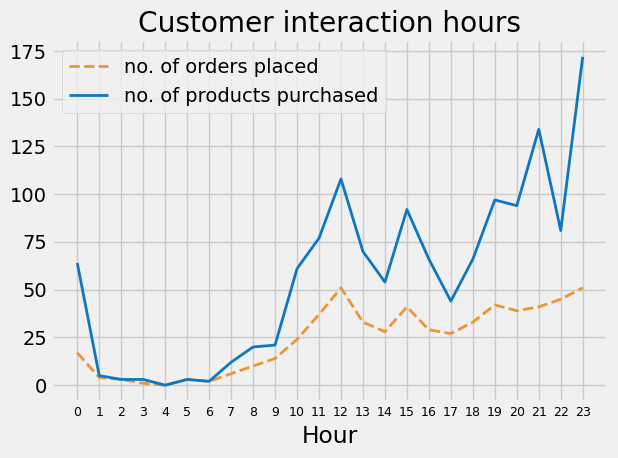

In [23]:
# no of orders placed in each hour 
plt.style.use("fivethirtyeight")
y_axis1 = df['Hour'].value_counts().sort_index().tolist()
y_axis1.insert(4, 0)

# no of products sold in each hour
days_sale = df[['Hour', 'No of products']]
result2 = days_sale.groupby('Hour').sum()
y_axis3 = result2['No of products'].tolist()
y_axis3.insert(4, 0)

x_indexes = np.arange(len(range(0,24)))

plt.plot(x_indexes, y_axis1, label="no. of orders placed", linestyle="--", color="#EA9637", linewidth='2')
plt.plot(x_indexes, y_axis3, label="no. of products purchased", color="#0E77BF", linewidth='2')

plt.xticks(range(0,24), size=9)
plt.xlabel("Hour")
plt.legend()
plt.title("Customer interaction hours")
plt.tight_layout()
plt.show()

# 2) No of orders placed in each day 

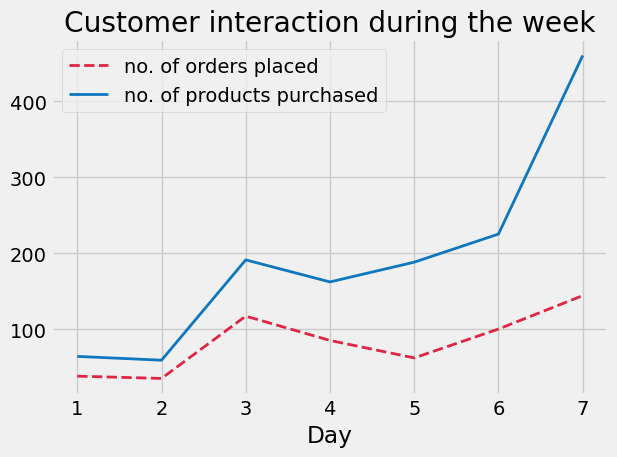

In [24]:
#2 No of orders placed in each day - bar graph 
plt.style.use("fivethirtyeight")
x_axis = range(1,8)

# No of orders placed in each day 
y_axis2 = []
res1 = df['Day'].value_counts().sort_index().to_frame()
res1 = res1.values.tolist()
for i in res1:
    for j in i:
        y_axis2.append(j)
y_axis2

plt.plot(x_axis, y_axis2, label="no. of orders placed", color="#DF2542", linestyle="--", linewidth='2')

# # No of products sold in each day 
# df['No of products'].value_counts()
days_sale = df[['Day', 'No of products']]
result = days_sale.groupby('Day').sum()
y_axis4 = result['No of products'].tolist()
 
plt.plot(x_axis, y_axis4, label="no. of products purchased", color="#0E77BF", linewidth='2')

plt.legend()
plt.xlabel("Day")
plt.title("Customer interaction during the week")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3) Top selling products 

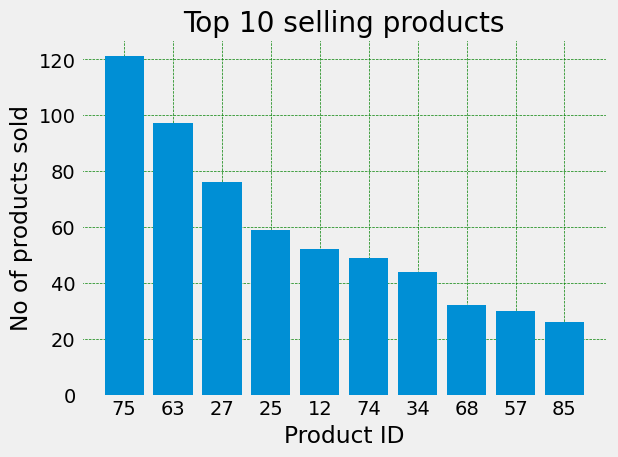

In [25]:
L = []
for bill in df['Product List']:
    for item in bill:
        L.append(item.split("_")[1])
# print(L)
L = pd.DataFrame(L)
L.value_counts()
L = L.value_counts().rename_axis('Product ID').reset_index(name='No of units sold')
# L

plt.style.use("fivethirtyeight")
# 10 Top selling products 
plt.bar(L['Product ID'][0:10].tolist(), L['No of units sold'][0:10].tolist(), zorder=3)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5, zorder=0)
plt.xlabel("Product ID")
plt.ylabel("No of products sold")
plt.title("Top 10 selling products")
plt.tight_layout()
plt.show()

In [26]:
# Finding our top products 
L = []
for bill in df['Product List']:
    for item in bill:
        L.append(int(item.split("_")[1]))
# print(L)
L = pd.DataFrame(L)
L.value_counts()

75    121
63     97
27     76
25     59
12     52
     ... 
13      1
45      1
93      1
73      1
17      1
Length: 95, dtype: int64

In [27]:
L = L.value_counts().rename_axis('Product ID').reset_index(name='No of units sold')
L

,Product ID,No of units sold
0,75,121
1,63,97
2,27,76
3,25,59
4,12,52
...,...,...
90,13,1
91,45,1
92,93,1
93,73,1


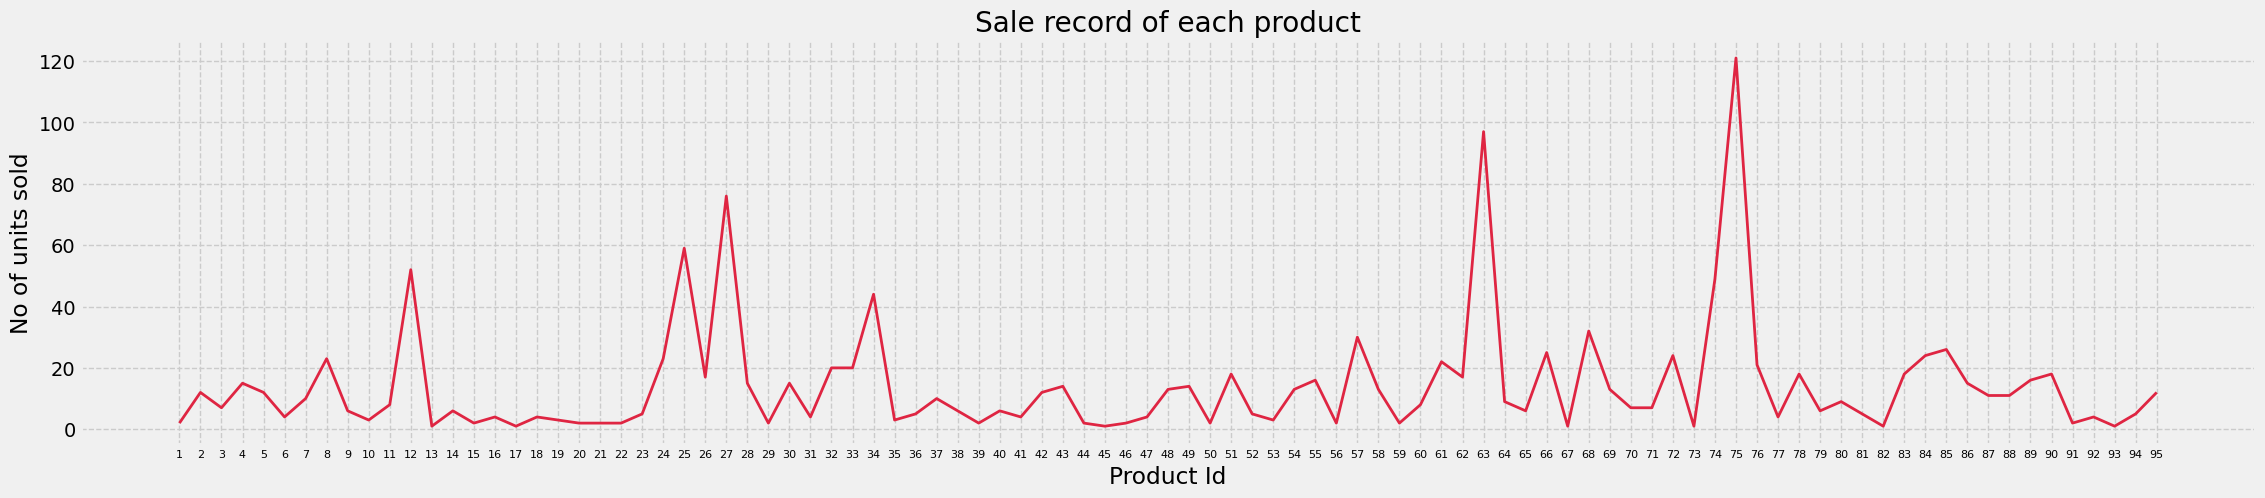

In [28]:
df6 = L.sort_values('Product ID')
df6
productid_x = df6['Product ID']
productid_y = df6['No of units sold']


plt.plot(productid_x, productid_y, color='#DF2542', linewidth=2)
plt.xticks(productid_x, size=8)
plt.gcf().set_size_inches(25, 5)
plt.grid(True, linestyle="--")
plt.xlabel("Product Id")
plt.ylabel("No of units sold")
plt.title("Sale record of each product")
# plt.axhline(y = 61, color = 'green', linestyle = '-')

plt.show()

# 4) Above average products 

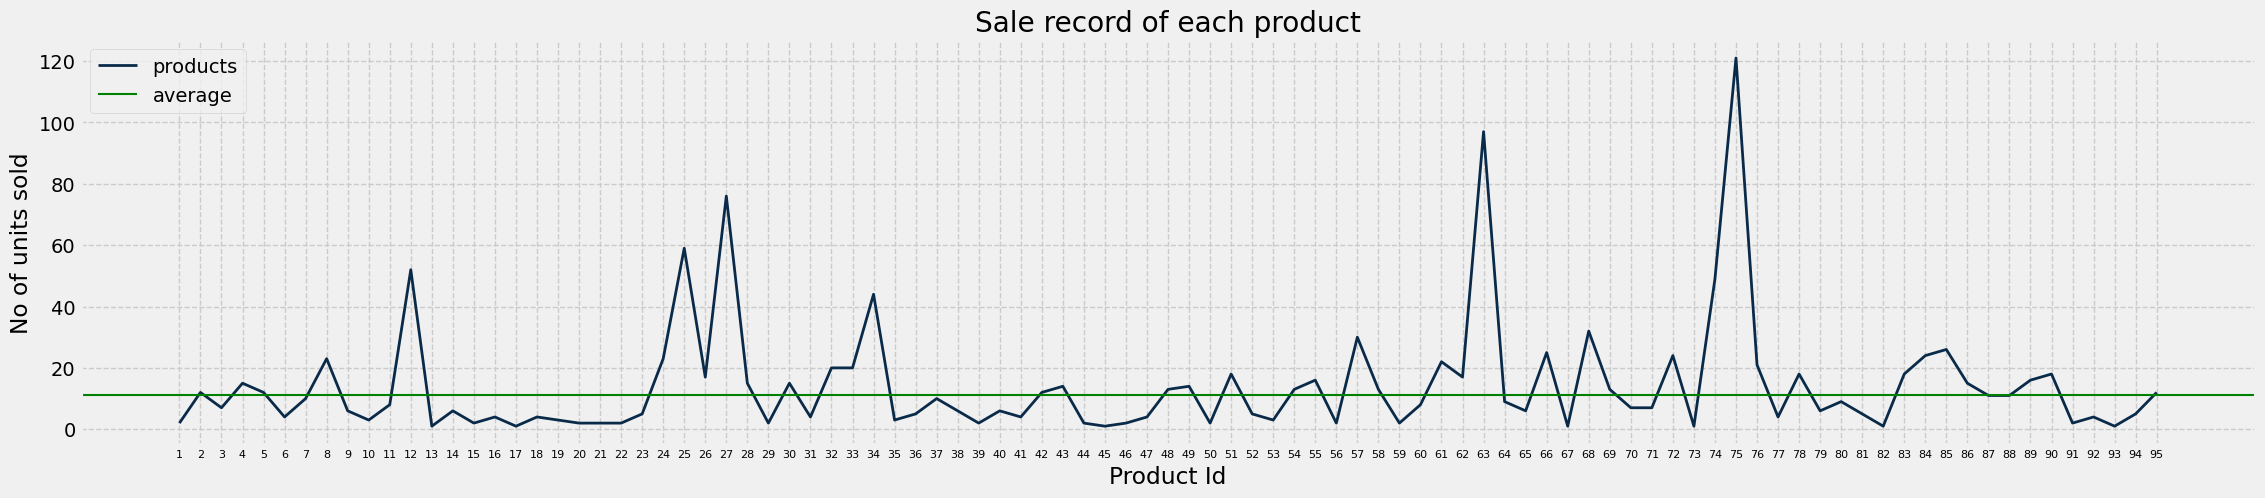

In [29]:
df6.describe(include="all")


plt.plot(df6['Product ID'], df6['No of units sold'], color='#092A49', linewidth=2, label="products")
plt.xticks(df6['Product ID'], size=8)
plt.gcf().set_size_inches(25, 5)
plt.grid(True, linestyle="--")
plt.xlabel("Product Id")
plt.ylabel("No of units sold")
plt.title("Sale record of each product")
plt.axhline(y = 11, color = 'green', linestyle = '-', label="average", linewidth=1.5)
plt.legend(loc='upper left')

plt.show()

#  Product Affinity 

In [30]:
from collections import Counter
def product_affinity(i):
    x = Counter(tuple(x) for x in df[df['No of products'] == i]['ProductID List'].tolist())
    return x.most_common()

In [31]:
# two most commonly paired products 
two_most_common_products = product_affinity(2)
two_most_common_products #tuple
two_most_common_products_lists = [list(x) for x in two_most_common_products]
two_most_common_products_lists[0:5]

[[(68, 75), 11], [(27, 63), 10], [(63, 75), 6], [(27, 75), 4], [(25, 27), 3]]

In [32]:
# 3 most commonly paired products 
three_most_common_products = product_affinity(3)
three_most_common_products #tuple
three_most_common_products_lists = [list(x) for x in three_most_common_products]
three_most_common_products_lists

[[(12, 27, 63), 2],
 [(24, 26, 34), 1],
 [(34, 72, 78), 1],
 [(34, 68, 89), 1],
 [(27, 33, 75), 1],
 [(27, 63, 90), 1],
 [(40, 66, 83), 1],
 [(76, 78, 86), 1],
 [(27, 63, 75), 1],
 [(27, 63, 84), 1],
 [(7, 12, 30), 1],
 [(27, 63, 74), 1],
 [(8, 14, 25), 1],
 [(24, 30, 85), 1],
 [(2, 25, 37), 1],
 [(26, 75, 79), 1],
 [(8, 25, 64), 1],
 [(12, 25, 63), 1],
 [(25, 48, 54), 1],
 [(24, 26, 51), 1],
 [(8, 38, 71), 1],
 [(4, 34, 66), 1],
 [(12, 63, 89), 1],
 [(9, 23, 94), 1],
 [(27, 74, 88), 1],
 [(27, 74, 76), 1],
 [(33, 85, 90), 1],
 [(12, 27, 57), 1],
 [(13, 21, 62), 1],
 [(32, 37, 87), 1],
 [(49, 78, 85), 1],
 [(32, 48, 87), 1],
 [(25, 27, 68), 1],
 [(24, 25, 68), 1],
 [(33, 37, 74), 1],
 [(12, 37, 64), 1],
 [(34, 58, 66), 1],
 [(68, 75, 84), 1]]

In [33]:
# 4 most commonly paired products 
four_most_common_products = product_affinity(4)
four_most_common_products_lists = [list(x) for x in four_most_common_products]
four_most_common_products_lists

[[(4, 34, 57, 66), 2],
 [(34, 57, 86, 89), 1],
 [(34, 58, 66, 83), 1],
 [(5, 27, 63, 90), 1],
 [(27, 63, 72, 90), 1],
 [(26, 66, 72, 83), 1],
 [(11, 25, 54, 80), 1],
 [(9, 34, 42, 62), 1],
 [(63, 68, 75, 88), 1],
 [(5, 7, 66, 83), 1],
 [(5, 34, 57, 66), 1],
 [(27, 33, 74, 75), 1],
 [(68, 75, 84, 88), 1],
 [(30, 51, 78, 95), 1],
 [(72, 76, 78, 89), 1],
 [(27, 48, 78, 88), 1],
 [(2, 8, 57, 69), 1],
 [(7, 57, 74, 88), 1],
 [(25, 54, 69, 87), 1],
 [(12, 33, 42, 85), 1],
 [(24, 51, 76, 89), 1],
 [(32, 35, 79, 90), 1],
 [(27, 63, 75, 90), 1],
 [(3, 54, 69, 87), 1],
 [(28, 61, 63, 74), 1],
 [(24, 26, 30, 72), 1],
 [(68, 72, 75, 84), 1],
 [(63, 68, 75, 90), 1],
 [(12, 62, 74, 85), 1],
 [(27, 51, 80, 89), 1],
 [(33, 37, 42, 85), 1],
 [(4, 63, 66, 83), 1],
 [(7, 25, 26, 72), 1]]

In [34]:
# 5 most commonly paired products 
five_most_common_products = product_affinity(5)
five_most_common_products_lists = [list(x) for x in five_most_common_products]
five_most_common_products_lists

[[(51, 57, 72, 78, 86), 1],
 [(27, 63, 68, 75, 84), 1],
 [(27, 63, 68, 75, 88), 1],
 [(25, 27, 63, 75, 84), 1],
 [(27, 42, 63, 66, 74), 1],
 [(57, 76, 78, 86, 89), 1],
 [(25, 27, 48, 63, 84), 1],
 [(38, 54, 60, 69, 80), 1],
 [(12, 25, 32, 57, 89), 1],
 [(8, 25, 64, 69, 70), 1],
 [(2, 31, 33, 37, 85), 1],
 [(54, 63, 71, 75, 86), 1]]

In [35]:
def countFreq(tup1, tup2, f1, f2):
    if set(tup1).issubset(tup2):
        f1 = f1 + f2
    return f1 

## 5) Calculating for most commonly paired 2 products 

In [36]:
# After comparing two_most_common_products with three_most_common_products

for i in two_most_common_products_lists[0:5]:
    for j in three_most_common_products_lists:
        i[1] = countFreq(i[0], j[0], i[1], j[1])
two_most_common_products_lists[0:5]

[[(68, 75), 12], [(27, 63), 16], [(63, 75), 7], [(27, 75), 6], [(25, 27), 4]]

In [37]:
# After comparing two_most_common_products with four_most_common_products

for i in two_most_common_products_lists[0:5]:
    for j in four_most_common_products_lists:
        i[1] = countFreq(i[0], j[0], i[1], j[1])
two_most_common_products_lists[0:5]


[[(68, 75), 16], [(27, 63), 19], [(63, 75), 10], [(27, 75), 8], [(25, 27), 4]]

In [38]:
# After comparing two_most_common_products with five_most_common_products

for i in two_most_common_products_lists[0:5]:
    for j in five_most_common_products_lists:
        i[1] = countFreq(i[0], j[0], i[1], j[1])
two_most_common_products_lists[0:5]

[[(68, 75), 18], [(27, 63), 24], [(63, 75), 14], [(27, 75), 11], [(25, 27), 6]]

In [39]:
## Final result for two most commonly paired products 
common_pairs = [[(68, 75), 20], [(27, 63), 29], [(63, 75), 18], [(27, 75), 14], [(25, 27), 8]]

['(68, 75)', '(27, 63)', '(63, 75)', '(27, 75)', '(25, 27)']
[20, 29, 18, 14, 8]


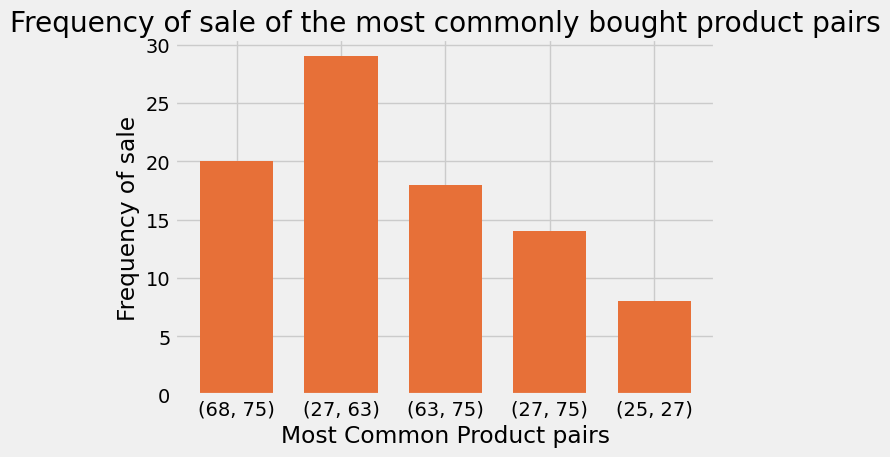

In [40]:
product_pair_x = []
freq_sale = []
for i in common_pairs:
    product_pair_x.append(str(i[0]))
    freq_sale.append(i[1])
    
print(product_pair_x)
print(freq_sale)
plt.style.use("fivethirtyeight")
plt.bar(product_pair_x,freq_sale, width=0.7, color="#E77038")
plt.xlabel('Most Common Product pairs')
plt.ylabel('Frequency of sale')
plt.title('Frequency of sale of the most commonly bought product pairs')
plt.tight_layout()
plt.show()

## 6) Calculation of most commonly paired 3 products 

In [41]:
# After comparing three_most_common_products with four_most_common_products

for i in three_most_common_products_lists:
    for j in four_most_common_products_lists:
        i[1] = countFreq(i[0], j[0], i[1], j[1])
three_most_common_products_lists

[[(12, 27, 63), 2],
 [(24, 26, 34), 1],
 [(34, 72, 78), 1],
 [(34, 68, 89), 1],
 [(27, 33, 75), 2],
 [(27, 63, 90), 4],
 [(40, 66, 83), 1],
 [(76, 78, 86), 1],
 [(27, 63, 75), 2],
 [(27, 63, 84), 1],
 [(7, 12, 30), 1],
 [(27, 63, 74), 1],
 [(8, 14, 25), 1],
 [(24, 30, 85), 1],
 [(2, 25, 37), 1],
 [(26, 75, 79), 1],
 [(8, 25, 64), 1],
 [(12, 25, 63), 1],
 [(25, 48, 54), 1],
 [(24, 26, 51), 1],
 [(8, 38, 71), 1],
 [(4, 34, 66), 3],
 [(12, 63, 89), 1],
 [(9, 23, 94), 1],
 [(27, 74, 88), 1],
 [(27, 74, 76), 1],
 [(33, 85, 90), 1],
 [(12, 27, 57), 1],
 [(13, 21, 62), 1],
 [(32, 37, 87), 1],
 [(49, 78, 85), 1],
 [(32, 48, 87), 1],
 [(25, 27, 68), 1],
 [(24, 25, 68), 1],
 [(33, 37, 74), 1],
 [(12, 37, 64), 1],
 [(34, 58, 66), 2],
 [(68, 75, 84), 3]]

In [42]:
# After comparing three_most_common_products with fivw_most_common_products

for i in three_most_common_products_lists:
    for j in five_most_common_products_lists:
        i[1] = countFreq(i[0], j[0], i[1], j[1])
three_most_common_products_lists

[[(12, 27, 63), 2],
 [(24, 26, 34), 1],
 [(34, 72, 78), 1],
 [(34, 68, 89), 1],
 [(27, 33, 75), 2],
 [(27, 63, 90), 4],
 [(40, 66, 83), 1],
 [(76, 78, 86), 2],
 [(27, 63, 75), 5],
 [(27, 63, 84), 4],
 [(7, 12, 30), 1],
 [(27, 63, 74), 2],
 [(8, 14, 25), 1],
 [(24, 30, 85), 1],
 [(2, 25, 37), 1],
 [(26, 75, 79), 1],
 [(8, 25, 64), 2],
 [(12, 25, 63), 1],
 [(25, 48, 54), 1],
 [(24, 26, 51), 1],
 [(8, 38, 71), 1],
 [(4, 34, 66), 3],
 [(12, 63, 89), 1],
 [(9, 23, 94), 1],
 [(27, 74, 88), 1],
 [(27, 74, 76), 1],
 [(33, 85, 90), 1],
 [(12, 27, 57), 1],
 [(13, 21, 62), 1],
 [(32, 37, 87), 1],
 [(49, 78, 85), 1],
 [(32, 48, 87), 1],
 [(25, 27, 68), 1],
 [(24, 25, 68), 1],
 [(33, 37, 74), 1],
 [(12, 37, 64), 1],
 [(34, 58, 66), 2],
 [(68, 75, 84), 4]]

In [43]:
# Create the pandas DataFrame
df4 = pd.DataFrame(three_most_common_products_lists, columns = ['Commonly Paired Three Items', 'Frequency of sale'])
 
# print dataframe.
df4 = df4[df4['Frequency of sale']>2]
df4

,Commonly Paired Three Items,Frequency of sale
5,"(27, 63, 90)",4
8,"(27, 63, 75)",5
9,"(27, 63, 84)",4
21,"(4, 34, 66)",3
37,"(68, 75, 84)",4


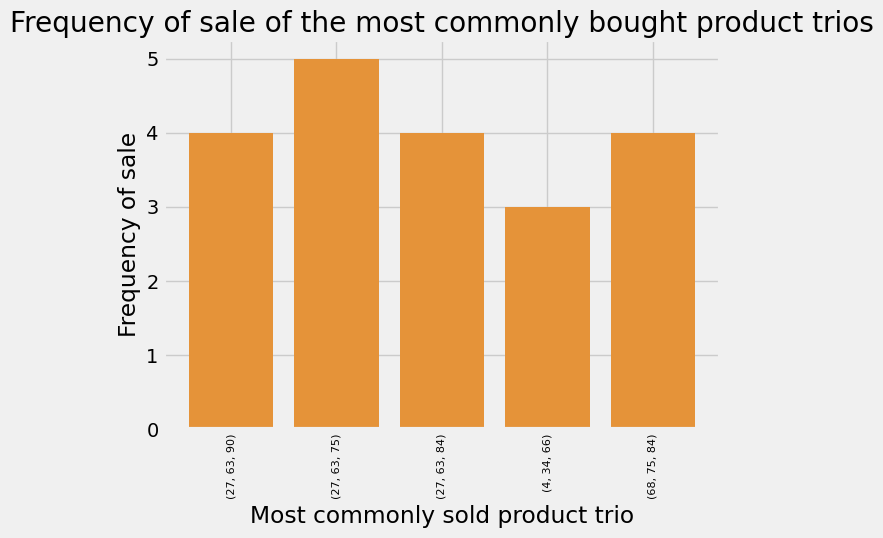

In [44]:
df4['Commonly Paired Three Items'].tolist()
three_commonly_paired_x = []
for i in df4['Commonly Paired Three Items'].tolist():
    three_commonly_paired_x.append(str(i))
    
three_commonly_paired_y = df4['Frequency of sale'].tolist()

plt.bar(three_commonly_paired_x, three_commonly_paired_y, color="#E59339")
plt.xticks(three_commonly_paired_x, rotation = "vertical", size = 8)
plt.xlabel("Most commonly sold product trio")
plt.ylabel("Frequency of sale")
plt.title('Frequency of sale of the most commonly bought product trios')
plt.show()

# 7) No. of items in a single order 

In [45]:
no_of_items_in_an_order = []
labels = []
for i in range(1,6):
    print("No of people who bought {} products : {} ".format(i, len(df[df['No of products'] == i])))
    no_of_items_in_an_order.append(len(df[df['No of products'] == i]))
no_of_items_in_an_order.append(len(df[df['No of products'] > 6]))

labels.append("{} product".format(1))
for i in range(2, 6):
    labels.append("{} products".format(i))
labels.append("more than 6 products")

No of people who bought 1 products : 346 
No of people who bought 2 products : 108 
No of people who bought 3 products : 39 
No of people who bought 4 products : 34 
No of people who bought 5 products : 12 


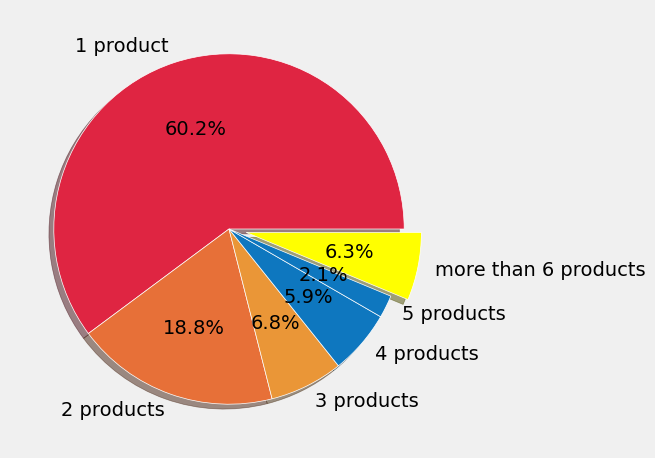

In [46]:
colors = ["#DF2542", "#E77038", "#EA9637", "#0E77BF", "#0E77BF", "yellow"]
plt.style.use("fivethirtyeight")
plt.pie(no_of_items_in_an_order, labels=labels, wedgeprops= {'edgecolor': 'white'}, explode=[0,0,0,0,0,0.1], shadow=True, autopct='%1.1f%%', colors=colors)
plt.tight_layout()
plt.show()

# 8) Our top customers

In [47]:
top_customers = df[df['No of products']>4].sort_values('No of products', ascending=False)
top_customers[['Name', 'Email', 'Day','Hour', 'ProductID List', 'No of products']]

,Name,Email,Day,Hour,ProductID List,No of products
328,PERSON_310,PERSON_310@gmail.com,5,21,"[1, 4, 5, 7, 15, 16, 19, 20, 22, 24, 25, 26, 2...",47
576,PERSON_522,PERSON_522@gmail.com,7,23,"[11, 24, 25, 26, 27, 30, 32, 34, 38, 48, 51, 5...",25
521,PERSON_470,PERSON_470@gmail.com,7,20,"[2, 3, 6, 11, 12, 14, 28, 32, 36, 41, 43, 47, ...",23
578,PERSON_523,PERSON_523@gmail.com,7,23,"[2, 3, 6, 12, 14, 28, 33, 36, 41, 43, 47, 49, ...",21
336,PERSON_170,PERSON_170@gmail.com,5,23,"[1, 15, 16, 19, 20, 22, 29, 31, 35, 39, 46, 50...",17
575,PERSON_521,PERSON_521@gmail.com,7,23,"[2, 3, 6, 14, 32, 36, 37, 41, 47, 52, 64, 69, ...",16
443,PERSON_410,PERSON_410@tatasteel.com,7,00,"[4, 5, 9, 18, 23, 33, 34, 40, 42, 58, 65, 66, ...",16
397,PERSON_368,PERSON_368@chanderpur.com,6,18,"[12, 12, 27, 28, 43, 49, 55, 57, 61, 62, 74, 7...",15
438,PERSON_263,PERSON_263@gmail.com,7,00,"[24, 26, 30, 33, 51, 57, 62, 72, 74, 76, 86, 8...",13
402,PERSON_330,PERSON_330@gmail.com,6,19,"[4, 24, 32, 33, 37, 48, 57, 60, 74, 79, 83, 88]",12


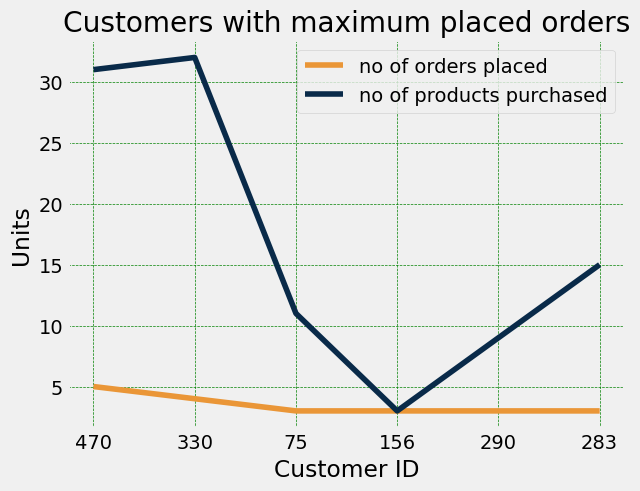

In [48]:
y_axis_orders = [5, 4, 3, 3, 3, 3]
y_axis_products = [31, 32, 11, 3, 9,15]
x_axis_customer = ["470", "330", "75", "156", "290", "283"]


width = 0.3
plt.plot(x_axis_customer, y_axis_orders, label="no of orders placed", color = "#EA9637")
plt.plot(x_axis_customer, y_axis_products, label="no of products purchased", color = "#092A49")
plt.title("Customers with maximum placed orders")
plt.xlabel("Customer ID")
plt.ylabel("Units")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5, zorder=0)
plt.legend()
# plt.xticks(x_axis_customer)
plt.show()

# 9) Analysing bulk orders 

In [49]:
bulk_orders = []

In [50]:
top_customerid_list = [310, 522, 470, 523, 170, 410, 521, 368, 263, 8]
for i in df.loc[df['Customer ID']==8]['ProductID List']:
    bulk_orders.append(i)
bulk_orders

[[5, 27, 63, 90], [10, 12, 28, 33, 43, 44, 49, 55, 61, 62, 74, 85]]

In [51]:
bulk_orders = [[1, 4, 5, 7, 15, 16, 19, 20, 22, 24, 25, 26, 27, 28, 29, 30, 31, 34, 34, 35, 38, 39, 46, 48, 50, 51, 54, 56,
                57, 58, 59, 60, 63, 65, 66, 71, 76, 78, 79, 80, 82, 83, 84, 87, 90, 91, 95], [11, 24, 25, 26, 27, 30, 32, 
                34, 38, 48, 51, 54, 60, 63, 68, 69, 71, 72, 76, 78, 80, 86, 87, 90, 95], [12, 62, 74, 85], [2, 3, 6, 11, 
                12, 14, 28, 32, 36, 41, 43, 47, 49, 52, 55, 61, 62, 64, 68, 70, 75, 85, 92], [37, 63], [81], [34], [8], 
               [2, 3, 6, 12, 14, 28, 33, 36, 41, 43, 47, 49, 52, 55, 61, 62, 64, 70, 74, 85, 92], [12], [1, 15, 16, 19, 
               20, 22, 29, 31, 35, 39, 46, 50, 56, 59, 67, 73, 91], [4, 5, 9, 18, 23, 33, 34, 40, 42, 58, 65, 66, 77, 81, 83, 
               94], [2, 3, 6, 14, 32, 36, 37, 41, 47, 52, 64, 69, 70, 85, 90, 92], [12, 12, 27, 28, 43, 49, 55, 57, 61, 62, 
               74, 75, 85, 85, 86], [34], [24, 26, 30, 33, 51, 57, 62, 72, 74, 76, 86, 89, 95], [5, 27, 63, 90], 
               [10, 12, 28, 33, 43, 44, 49, 55, 61, 62, 74, 85]]
print(bulk_orders)

[[1, 4, 5, 7, 15, 16, 19, 20, 22, 24, 25, 26, 27, 28, 29, 30, 31, 34, 34, 35, 38, 39, 46, 48, 50, 51, 54, 56, 57, 58, 59, 60, 63, 65, 66, 71, 76, 78, 79, 80, 82, 83, 84, 87, 90, 91, 95], [11, 24, 25, 26, 27, 30, 32, 34, 38, 48, 51, 54, 60, 63, 68, 69, 71, 72, 76, 78, 80, 86, 87, 90, 95], [12, 62, 74, 85], [2, 3, 6, 11, 12, 14, 28, 32, 36, 41, 43, 47, 49, 52, 55, 61, 62, 64, 68, 70, 75, 85, 92], [37, 63], [81], [34], [8], [2, 3, 6, 12, 14, 28, 33, 36, 41, 43, 47, 49, 52, 55, 61, 62, 64, 70, 74, 85, 92], [12], [1, 15, 16, 19, 20, 22, 29, 31, 35, 39, 46, 50, 56, 59, 67, 73, 91], [4, 5, 9, 18, 23, 33, 34, 40, 42, 58, 65, 66, 77, 81, 83, 94], [2, 3, 6, 14, 32, 36, 37, 41, 47, 52, 64, 69, 70, 85, 90, 92], [12, 12, 27, 28, 43, 49, 55, 57, 61, 62, 74, 75, 85, 85, 86], [34], [24, 26, 30, 33, 51, 57, 62, 72, 74, 76, 86, 89, 95], [5, 27, 63, 90], [10, 12, 28, 33, 43, 44, 49, 55, 61, 62, 74, 85]]


In [52]:
frequency = {}
for lt in bulk_orders:
    for item in lt:
        if item in frequency:
            frequency[item] += 1
        else:
      # initializing the count
          frequency[item] = 1
        
print(frequency)

{1: 2, 4: 2, 5: 3, 7: 1, 15: 2, 16: 2, 19: 2, 20: 2, 22: 2, 24: 3, 25: 2, 26: 3, 27: 4, 28: 5, 29: 2, 30: 3, 31: 2, 34: 6, 35: 2, 38: 2, 39: 2, 46: 2, 48: 2, 50: 2, 51: 3, 54: 2, 56: 2, 57: 3, 58: 2, 59: 2, 60: 2, 63: 4, 65: 2, 66: 2, 71: 2, 76: 3, 78: 2, 79: 1, 80: 2, 82: 1, 83: 2, 84: 1, 87: 2, 90: 4, 91: 2, 95: 3, 11: 2, 32: 3, 68: 2, 69: 2, 72: 2, 86: 3, 12: 7, 62: 6, 74: 5, 85: 7, 2: 3, 3: 3, 6: 3, 14: 3, 36: 3, 41: 3, 43: 4, 47: 3, 49: 4, 52: 3, 55: 4, 61: 4, 64: 3, 70: 3, 75: 2, 92: 3, 37: 2, 81: 2, 8: 1, 33: 4, 67: 1, 73: 1, 9: 1, 18: 1, 23: 1, 40: 1, 42: 1, 77: 1, 94: 1, 89: 1, 10: 1, 44: 1}


In [53]:
import operator
sorted_freq = dict( sorted(frequency.items(), key=operator.itemgetter(1),reverse=True))
sorted_freq

{12: 7,
 85: 7,
 34: 6,
 62: 6,
 28: 5,
 74: 5,
 27: 4,
 63: 4,
 90: 4,
 43: 4,
 49: 4,
 55: 4,
 61: 4,
 33: 4,
 5: 3,
 24: 3,
 26: 3,
 30: 3,
 51: 3,
 57: 3,
 76: 3,
 95: 3,
 32: 3,
 86: 3,
 2: 3,
 3: 3,
 6: 3,
 14: 3,
 36: 3,
 41: 3,
 47: 3,
 52: 3,
 64: 3,
 70: 3,
 92: 3,
 1: 2,
 4: 2,
 15: 2,
 16: 2,
 19: 2,
 20: 2,
 22: 2,
 25: 2,
 29: 2,
 31: 2,
 35: 2,
 38: 2,
 39: 2,
 46: 2,
 48: 2,
 50: 2,
 54: 2,
 56: 2,
 58: 2,
 59: 2,
 60: 2,
 65: 2,
 66: 2,
 71: 2,
 78: 2,
 80: 2,
 83: 2,
 87: 2,
 91: 2,
 11: 2,
 68: 2,
 69: 2,
 72: 2,
 75: 2,
 37: 2,
 81: 2,
 7: 1,
 79: 1,
 82: 1,
 84: 1,
 8: 1,
 67: 1,
 73: 1,
 9: 1,
 18: 1,
 23: 1,
 40: 1,
 42: 1,
 77: 1,
 94: 1,
 89: 1,
 10: 1,
 44: 1}

In [54]:
# worst selling products that are not even included in bulk order 

In [55]:
list2 = range(1, 96) #product_range
list1 = sorted_freq.keys() #product_sold_to_bulk_cut

main_list = set(list2) - set(list1)
main_list

{13, 17, 21, 45, 53, 88, 93}

# 10) 239 out of 525 customers have multiple product purchases.

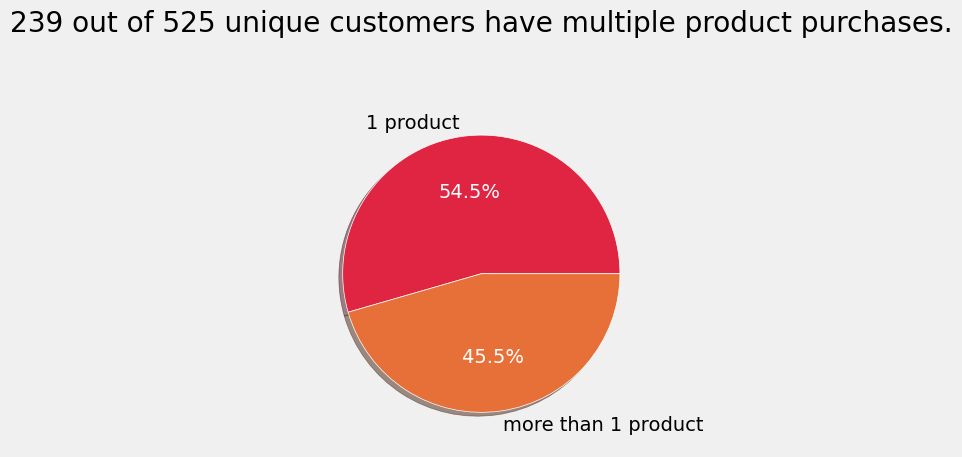

In [56]:
plt.figure()
plt.style.use("fivethirtyeight")

qty = [286, 239]
labels = ['1 product', 'more than 1 product']
colors = ["#DF2542", "#E77038"]
_, _, autotexts = plt.pie(qty, labels=labels, colors=colors, autopct="%1.1f%%", wedgeprops= {'edgecolor': 'white'}, shadow=True)

for ins in autotexts:
    ins.set_color('white')
    
plt.title("239 out of 525 unique customers have multiple product purchases.", pad=50)
plt.tight_layout()

plt.show()